In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

**Gini impurity will have its highest value when we have two classes and the class labels within a subset of data is evenly divided.**

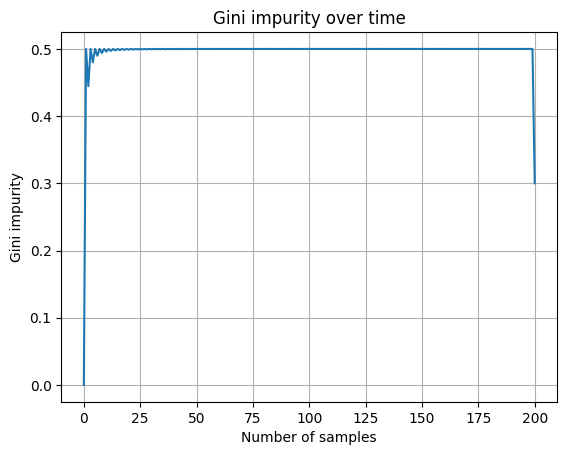

In [ ]:
labels = [0, 1] * 100
class_labels = np.array(labels)

gini_values = []

for i in range(1, len(class_labels)+1):
    subset = class_labels[:i]
    p0 = np.count_nonzero(subset == 0) / i
    p1 = np.count_nonzero(subset == 1) / i
    
    gini = 1 - (p0**2 + p1**2)
    gini_values.append(gini)

plt.plot(gini_values)
plt.xlabel("Number of samples")
plt.ylabel("Gini impurity")
plt.title("Gini impurity over time")
plt.grid(True)
plt.show()


**Gini impurity function**


In [ ]:
def gini_impurity(labels):
    if len(labels) == 0:
        return 0
    unique_labels = np.unique(labels)
    imps = 0
    for label in unique_labels:
        imps += (np.count_nonzero(labels == label) / len(labels)) ** 2
    
    return 1 - imps

print(gini_impurity([1, 1, 0, 1, 0, 0], ))

**Entropy**

In [ ]:
def entropy(labels):
    if len(labels) == 0: return 0
    label_occurences = np.unique_counts(labels).counts
    label_occurences = label_occurences /  len(labels)
    
    entropy = - np.sum(label_occurences * np.log2(label_occurences))
    return entropy

print(f"{entropy([0,0,1,1]):.4f}")

**Combination of both metrics**

In [ ]:
criterion_function = {
    'gini': gini_impurity,
    'entropy': entropy
}

def weighted_sum(groups, metric='gini'):
    total_samples = sum(len(group) for group in groups)
    weighted_s = 0.0

    for group in groups:
        weighted_s += len(group) / float(total_samples) * criterion_function[metric](group)

    return weighted_s

**Function to perform data split on a particular feature**

In [ ]:
def split_node(X, y, index, value):
    x_index = X.iloc[: , index]
    if pd.api.types.is_integer_dtype(x_index):
        mask  = x_index >= value 
    else:
        mask = x_index == value
    
    # split into right and left nodes
    left = [X[~mask, :], y[~mask]]
    right = [X[mask, :], y[mask]]
    return left, right